In [27]:
import pandas as pd
import numpy as np

In [28]:
import matplotlib.pylab as pylab

params = {'axes.labelsize': 'xx-large',
          'xtick.labelsize': 'xx-large',
          'ytick.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'legend.fontsize': 'x-large',
          #'font.size': 16,
          'axes.titlesize': 'xx-large'}
pylab.rcParams.update(params)

In [29]:
DAYS = 7
PERIOD = 24*DAYS
START = 0
CONVENTIONAL_DIR = '20 bin PPO 500 results' + '/'
ATLA_DIR = 'PPO agent 100 alts over 0+500 1-17-21 results' + '/'

In [30]:
baseline_a = np.genfromtxt(CONVENTIONAL_DIR+'rebaseline a.csv', delimiter=',')

In [31]:
acg_a = np.genfromtxt(CONVENTIONAL_DIR+'adv_perturbed_obs_a.csv', delimiter=',')

In [32]:
df_actions = pd.DataFrame({'Clean':baseline_a, 'Untargeted_ACG':acg_a})

In [33]:
df_actions['Optimal_BB'] = np.genfromtxt(CONVENTIONAL_DIR+'Optimal myBB actions.csv', delimiter=',')

In [34]:
df_actions['Untargeted_BB'] = np.genfromtxt(CONVENTIONAL_DIR+'bb results/bb obs_a.csv', delimiter=',')

In [35]:
df_actions['ATLA_Clean'] = pd.read_csv(ATLA_DIR+'baseline_obs-a.csv',
                                            header=0,
                                            usecols=['actions'],)

In [36]:
df_actions['Untargeted_Binary_ACG_05'] = pd.read_csv(r'20 bin PPO 500 results\binary classifier uACG results\uACG CWloss 5% eps adv a-obs.csv',
                                            header=0,
                                            usecols=['a'],)

In [37]:
df_actions['Untargeted_Binary_ACG_05_Clean'] = pd.read_csv(r'20 bin PPO 500 results\binary classifier uACG results\uACG CWloss 5% eps a-obs.csv',
                                            header=0,
                                            usecols=['a'],)

In [38]:
df_actions['Untargeted_Binary_ACG_10'] = pd.read_csv(r'20 bin PPO 500 results\binary classifier uACG results\uACG CWloss 10% eps adv a-obs.csv',
                                            header=0,
                                            usecols=['a'],)

In [39]:
df_actions['Untargeted_Binary_ACG_10_Clean'] = pd.read_csv(r'20 bin PPO 500 results\binary classifier uACG results\uACG CWloss 10% eps a-obs.csv',
                                            header=0,
                                            usecols=['a'],)

Map agent actions to corresponding SoC

In [40]:
actions_to_SoC = np.linspace(-1.0,1.0,20)
df_actions.replace(dict(enumerate(actions_to_SoC)),inplace=True)

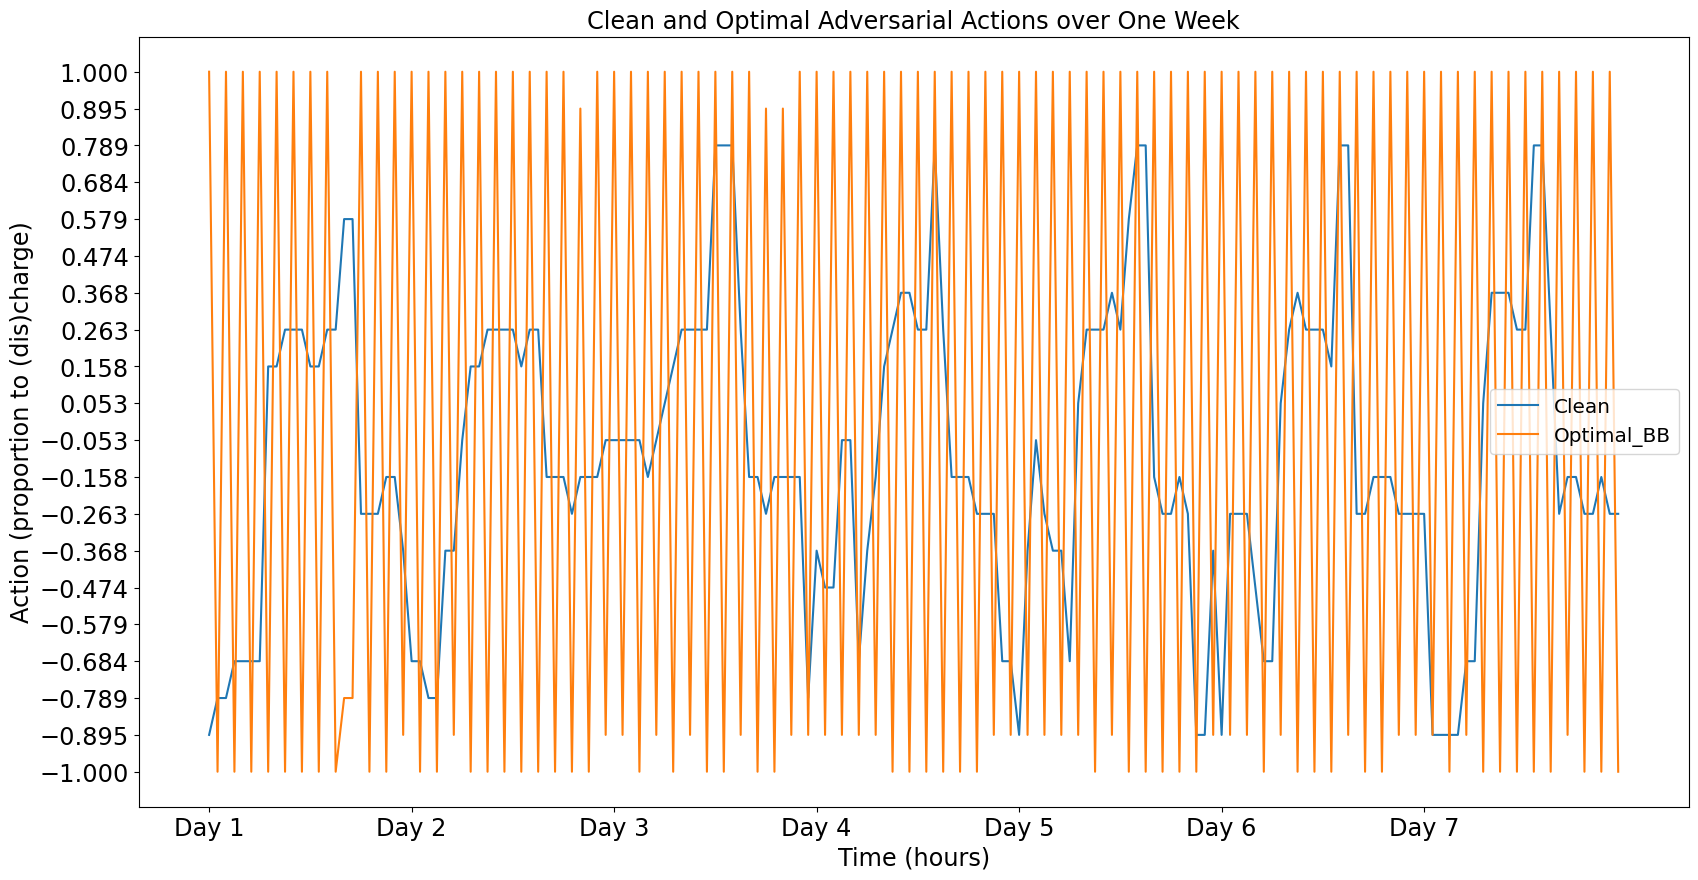

In [41]:
df_actions.iloc[START:START+PERIOD][['Clean','Optimal_BB']].plot.line(
    figsize=(20,10),
    ylabel='Action (proportion to (dis)charge)',
    yticks=actions_to_SoC,
    title='Clean and Optimal Adversarial Actions over One Week',
    xlabel='Time (hours)'
).set_xticks(ticks=range(0,PERIOD,24),
             labels=['Day ' + str(i+1) for i in range(DAYS)])

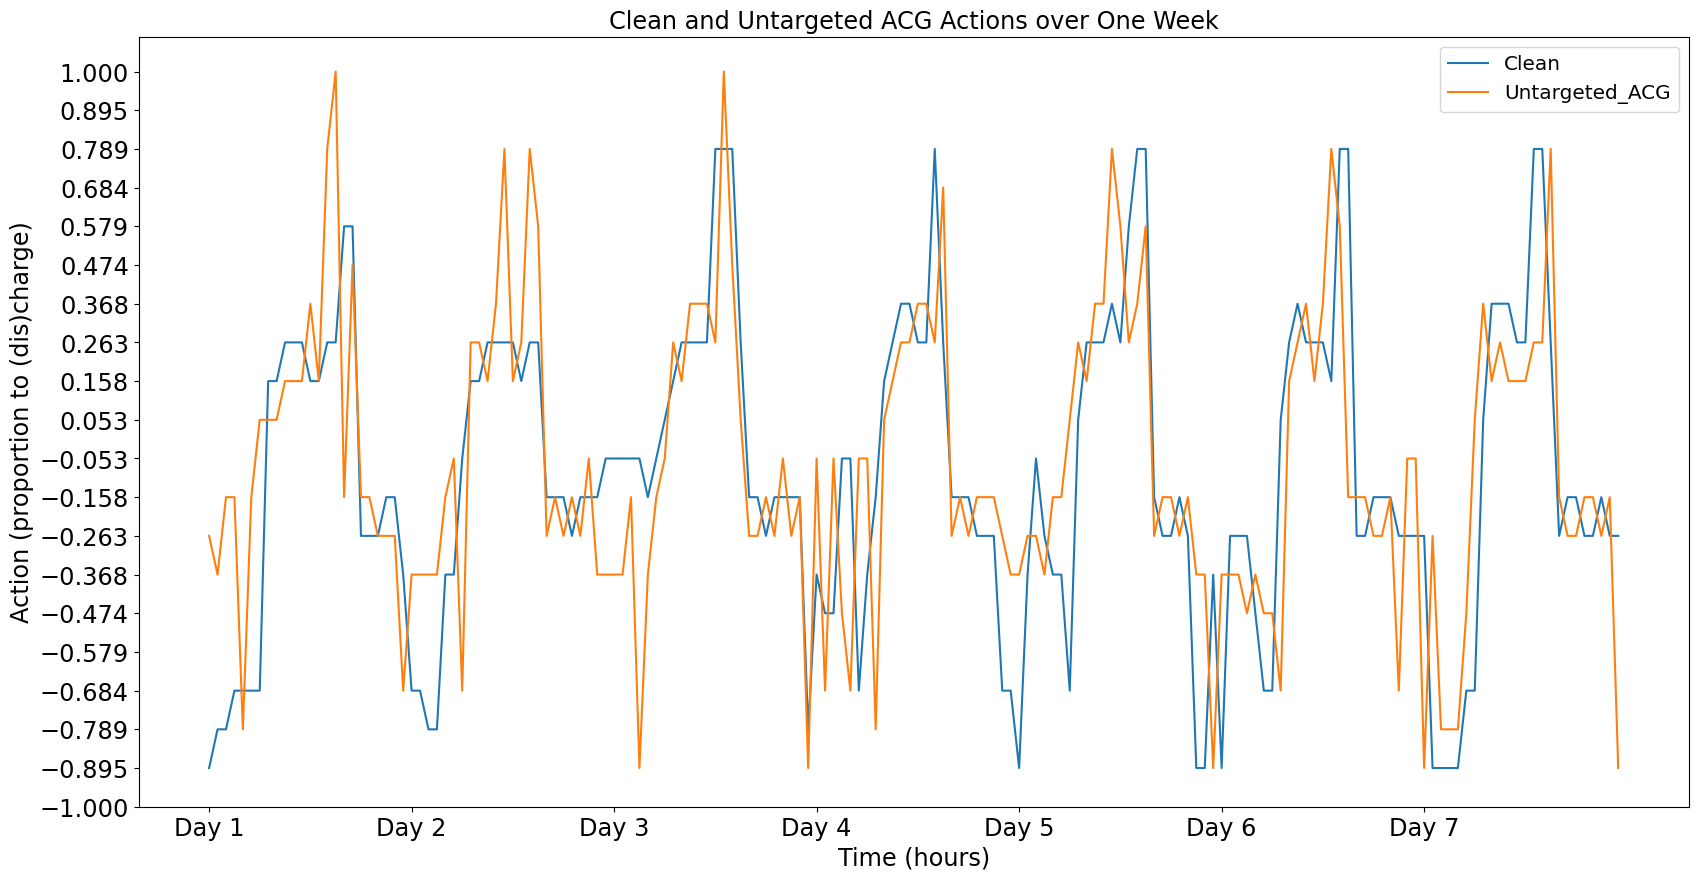

In [42]:
df_actions.iloc[START:START+PERIOD][['Clean','Untargeted_ACG']].plot.line(
    figsize=(20,10),
    ylabel='Action (proportion to (dis)charge)',
    yticks=actions_to_SoC,
    title='Clean and Untargeted ACG Actions over One Week',
    xlabel='Time (hours)'
).set_xticks(ticks=range(0,PERIOD,24),
             labels=['Day ' + str(i+1) for i in range(DAYS)])

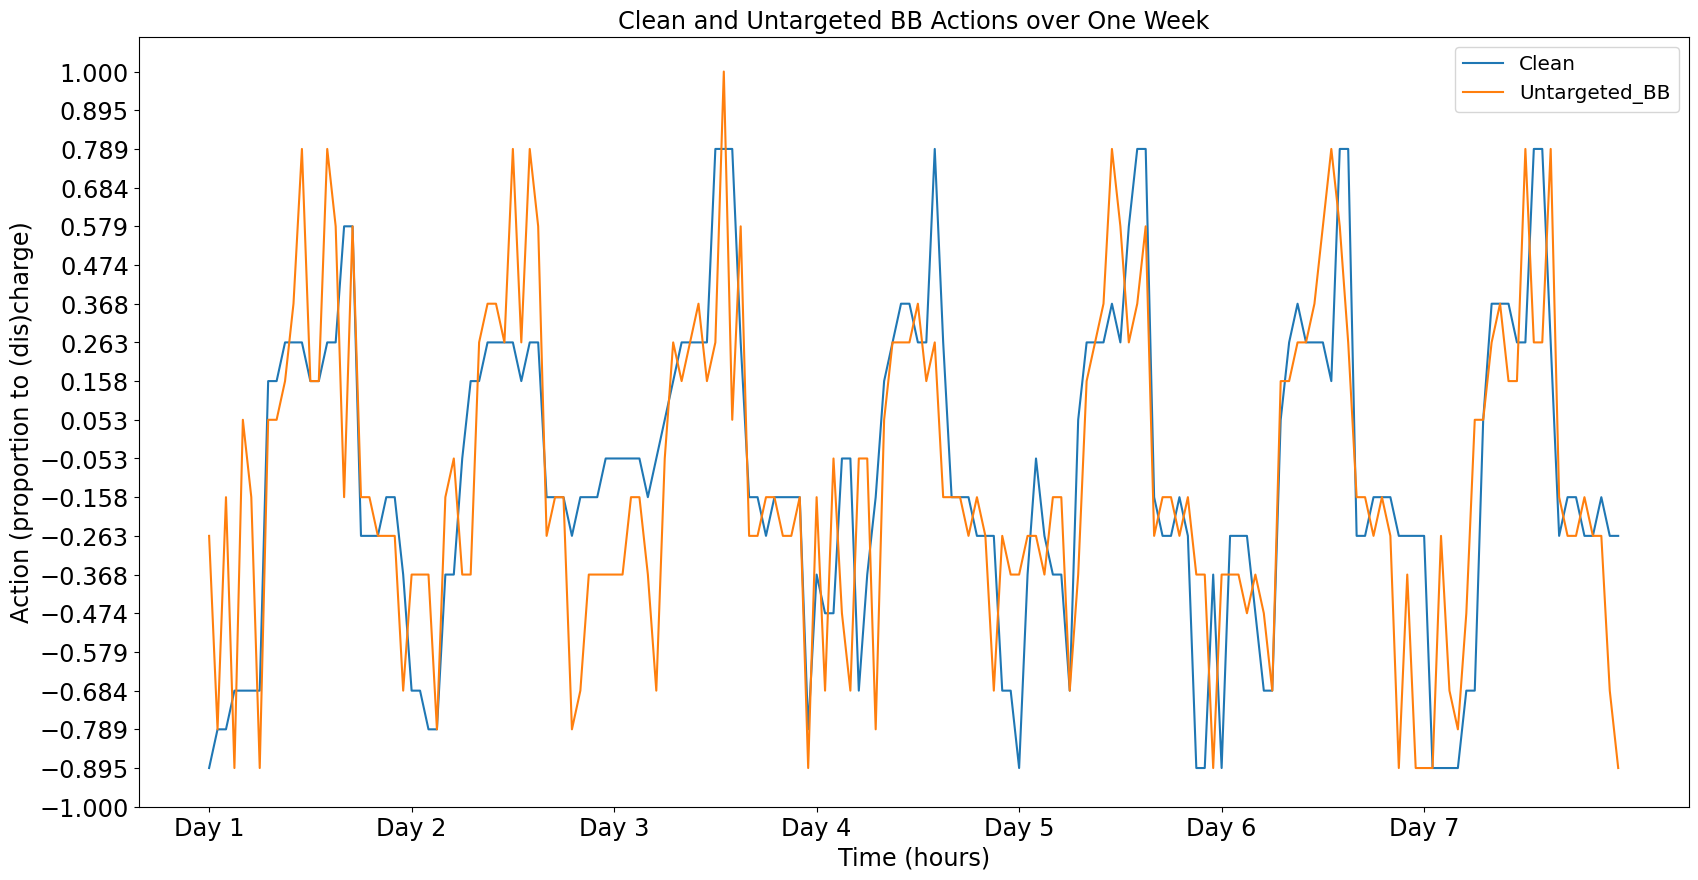

In [43]:
df_actions.iloc[START:START+PERIOD][['Clean','Untargeted_BB']].plot.line(
    figsize=(20,10),
    ylabel='Action (proportion to (dis)charge)',
    yticks=actions_to_SoC,
    title='Clean and Untargeted BB Actions over One Week',
    xlabel='Time (hours)'
).set_xticks(ticks=range(0,PERIOD,24),
             labels=['Day ' + str(i+1) for i in range(DAYS)])

NOte that the action differences are relatively small (~3 on average), and while the adversarial actions might be significantly noisier they almost always share a sign with the victim. This means that the attack may make the victim charge or discharge more than is optimal, but will not often make it discharge when it's optimal to charge, and vice versa.

In [44]:
proportion_BB = len(df_actions[df_actions['Clean']*df_actions['Untargeted_BB'] < 0])/len(df_actions)
print(f'The proportion of timesteps where the adversarial reversred the agent\'s charge/discharge decision: {proportion_BB}') 

The proportion of timesteps where the adversarial reversred the agent's charge/discharge decision: 0.0751227309053545


Action MAE for uBB:

In [45]:
(df_actions['Clean'] - df_actions['Untargeted_BB']).abs().mean()

0.25397035229928916

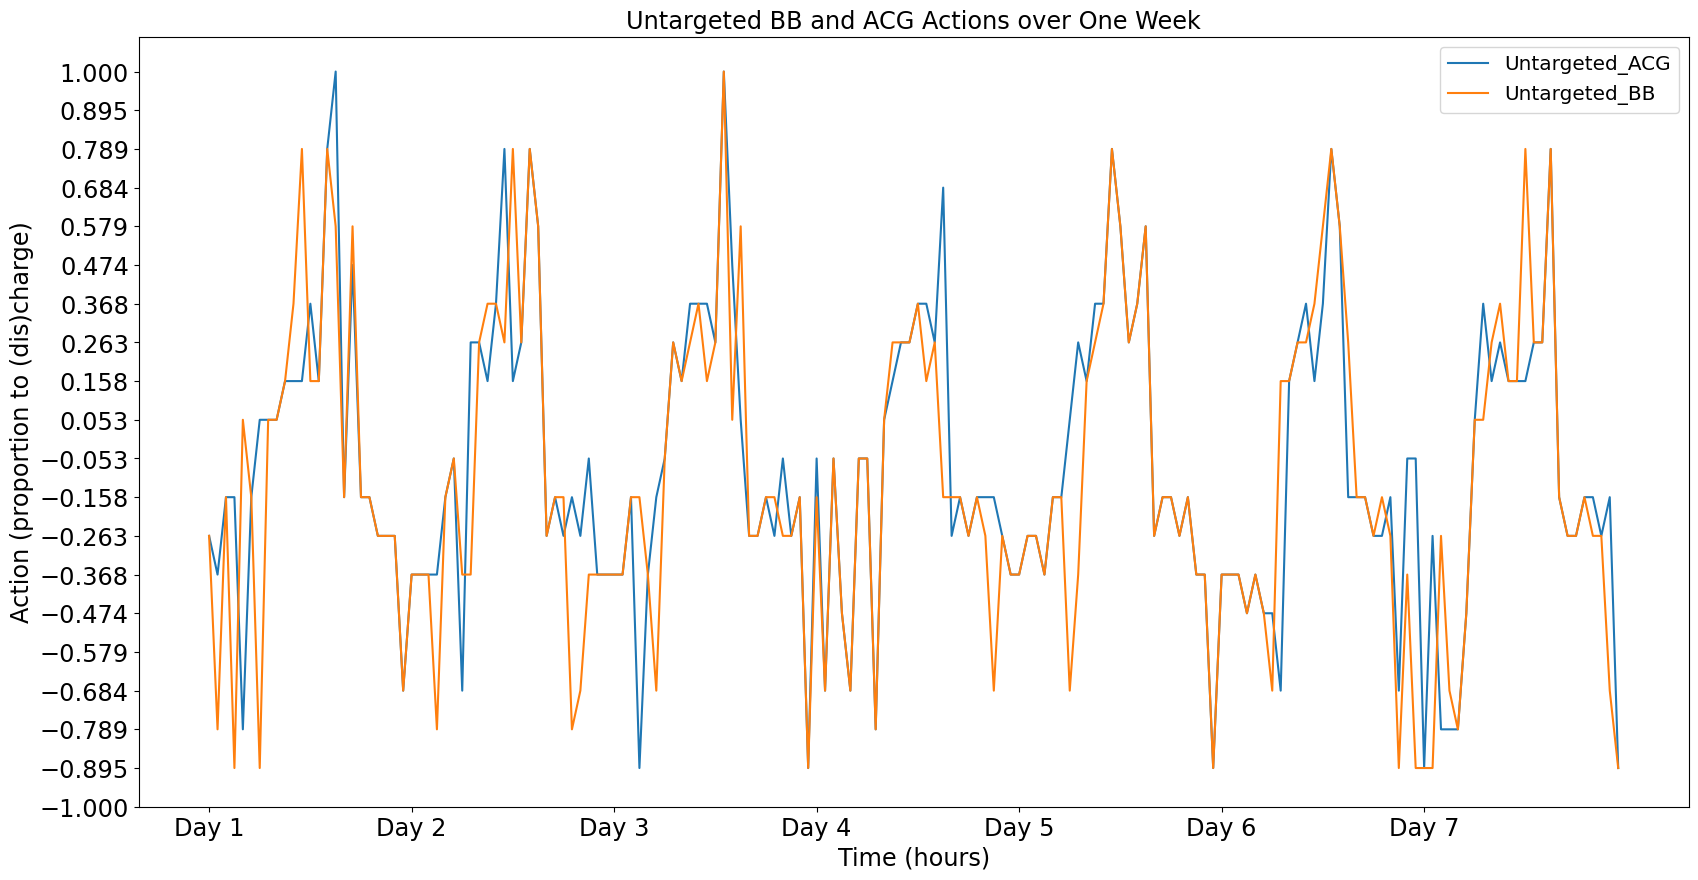

In [46]:
df_actions.iloc[START:START+PERIOD][['Untargeted_ACG','Untargeted_BB']].plot.line(
    figsize=(20,10),
    ylabel='Action (proportion to (dis)charge)',
    yticks=actions_to_SoC,
    title='Untargeted BB and ACG Actions over One Week',
    xlabel='Time (hours)'
).set_xticks(ticks=range(0,PERIOD,24),
             labels=['Day ' + str(i+1) for i in range(DAYS)])

In [47]:
proportion_acg = len(df_actions[df_actions['Clean']*df_actions['Untargeted_ACG'] < 0])/len(df_actions)
print(f'The proportion of timesteps where the adversarial reversred the agent\'s charge/discharge decision: {proportion_acg}')

The proportion of timesteps where the adversarial reversred the agent's charge/discharge decision: 0.06359173421623474


uACG action MAE:

In [48]:
(df_actions['Clean'] - df_actions['Untargeted_ACG']).abs().mean()

0.26191406132639505

In [49]:
proportion_BB/proportion_acg

1.1813285457809695

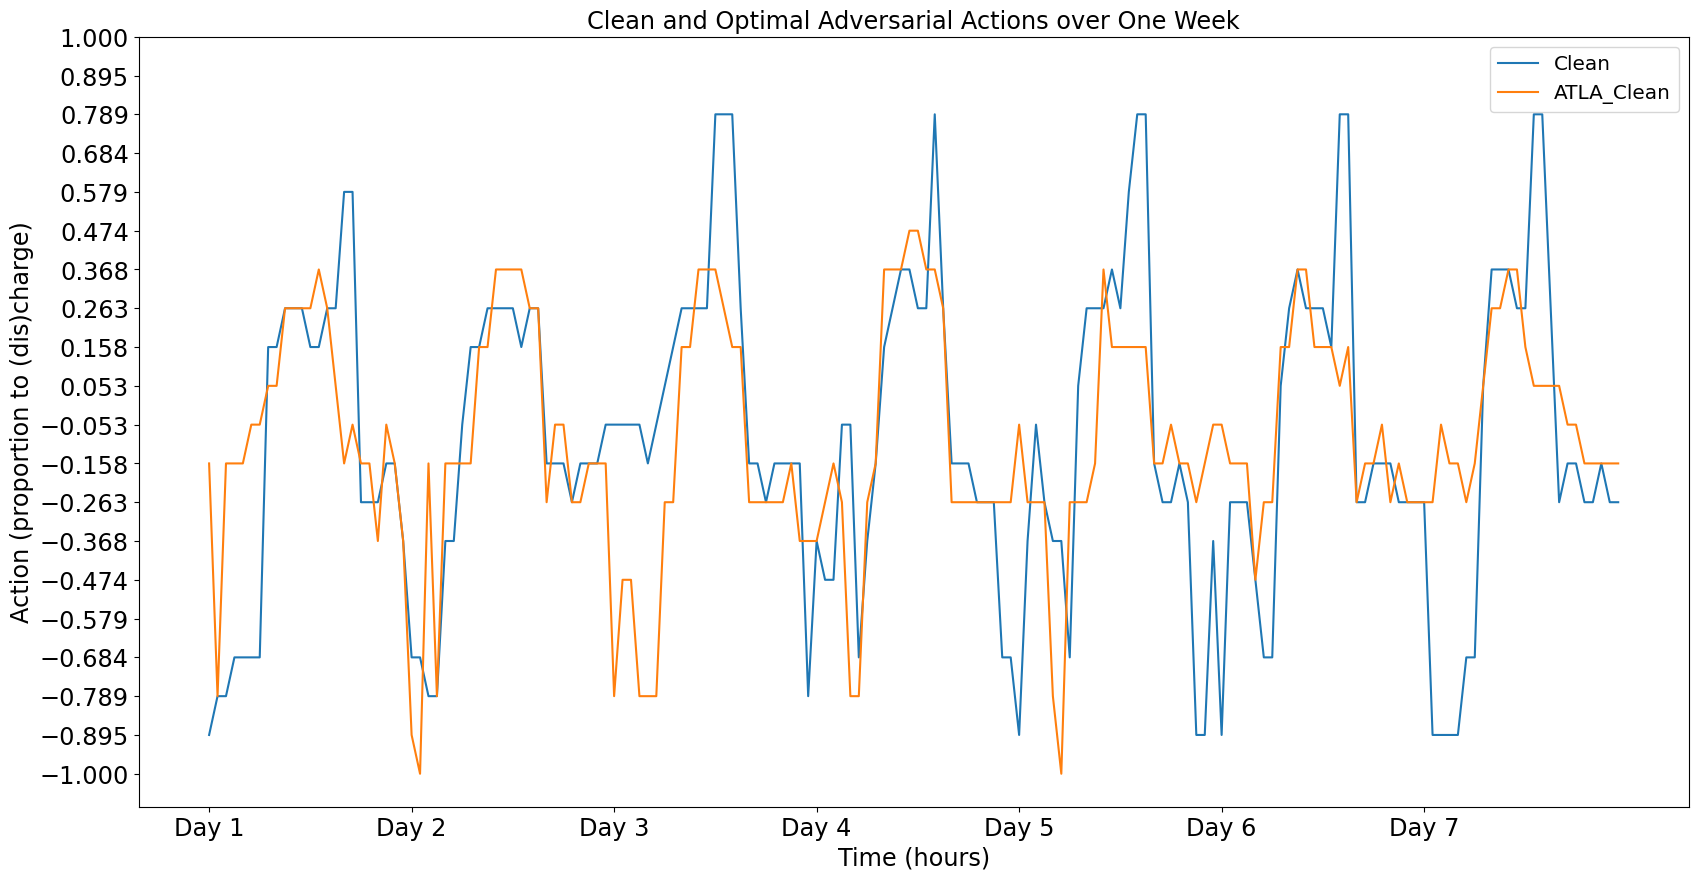

In [50]:
df_actions.iloc[START:START+PERIOD][['Clean','ATLA_Clean']].plot.line(
    figsize=(20,10),
    ylabel='Action (proportion to (dis)charge)',
    yticks=actions_to_SoC,
    title='Clean and Optimal Adversarial Actions over One Week',
    xlabel='Time (hours)'
).set_xticks(ticks=range(0,PERIOD,24),
             labels=['Day ' + str(i+1) for i in range(DAYS)])

ATLA actions apear more periodic, where it's more likely to fully charge and discharge in a given period regardless of the conditions. This policy of periodic discradging is harder to exploit because the agent simply reacts less to small changes in the environment. This is supported by the observations that ATLA for too long with too strong an adversary results in an agent that mimic the performance of no controller; there is minimial exploitability but also minimal benefits.

<Axes: title={'center': 'Clean and Untargeted ACG Actions over One Week'}, xlabel='Time (hours)', ylabel='Action (proportion to (dis)charge)'>

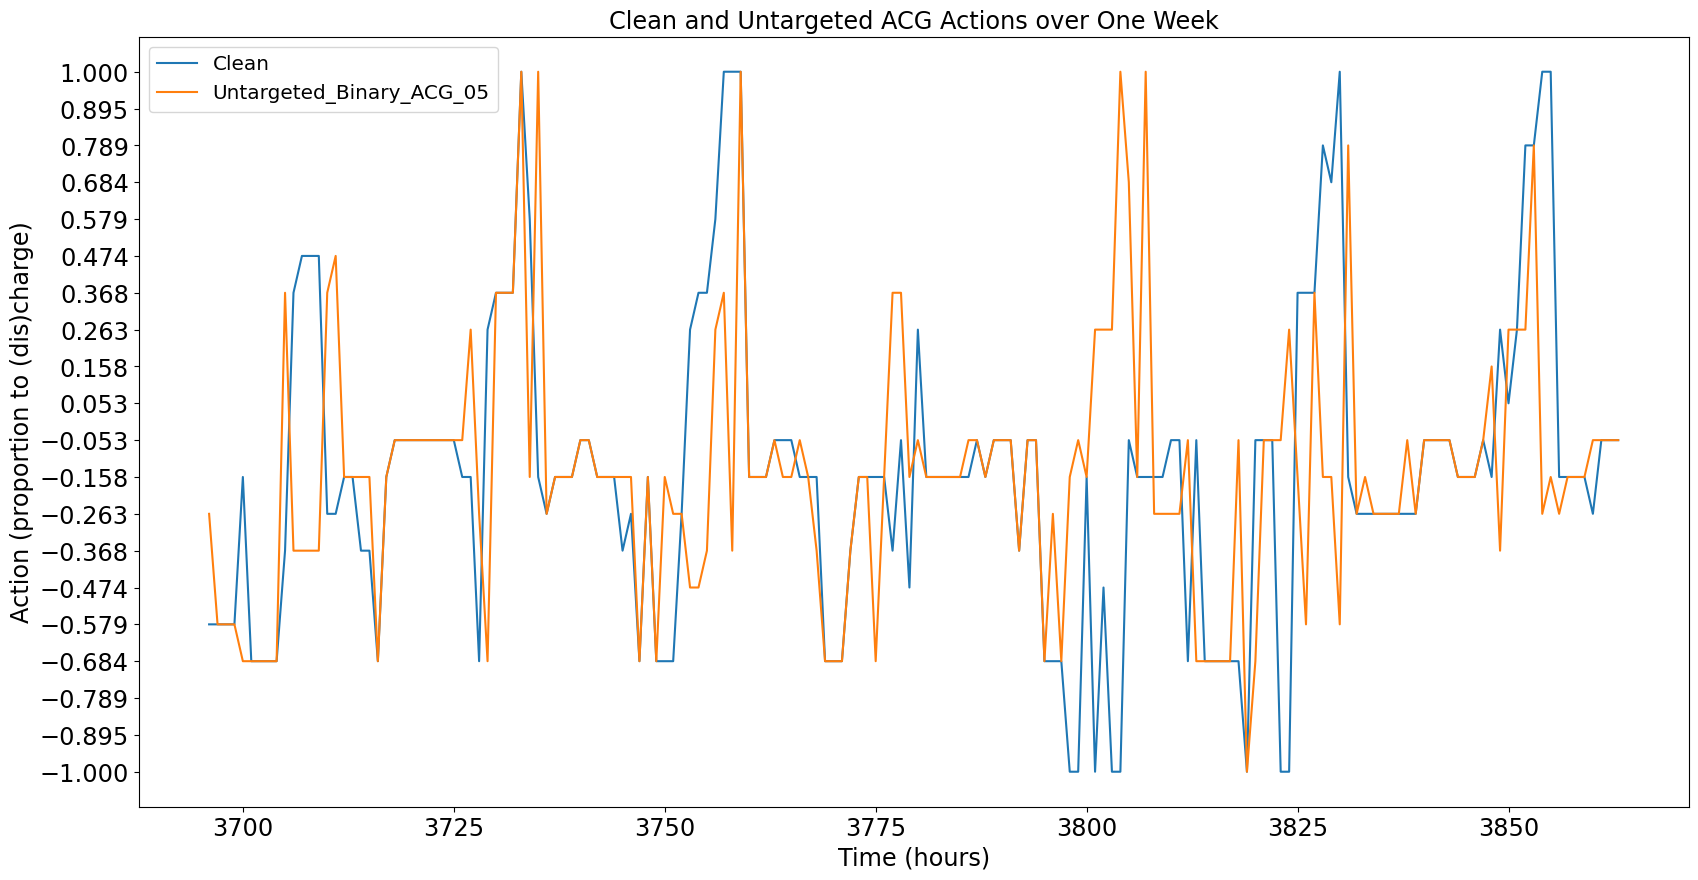

In [51]:
offest = 22*PERIOD
df_actions.iloc[START+offest:offest+START+PERIOD][['Clean','Untargeted_Binary_ACG_05']].plot.line(
    figsize=(20,10),
    ylabel='Action (proportion to (dis)charge)',
    yticks=actions_to_SoC,
    title='Clean and Untargeted ACG Actions over One Week',
    xlabel='Time (hours)'
)#.set_xticks(ticks=range(0,PERIOD,24),
#             labels=['Day ' + str(i+1) for i in range(DAYS)])

NB that both lines are from disserent traces/scenarios, the first being the ideal run and the second under the binary ACG attack. Not how the two traces are mirrored, showing that the binary attack makes the agent take the oposiste (dis)charge decision. Because these are from different scenario, it exaggerates the ASR because the two plots realy match. This is not the case with the clean and adv actions for the same scenario below.

Because the ASR varies, we picked a particularly successful week to illustrate the attack

<Axes: title={'center': 'Clean and Untargeted ACG Actions over One Week'}, xlabel='Time (hours)', ylabel='Action (proportion to (dis)charge)'>

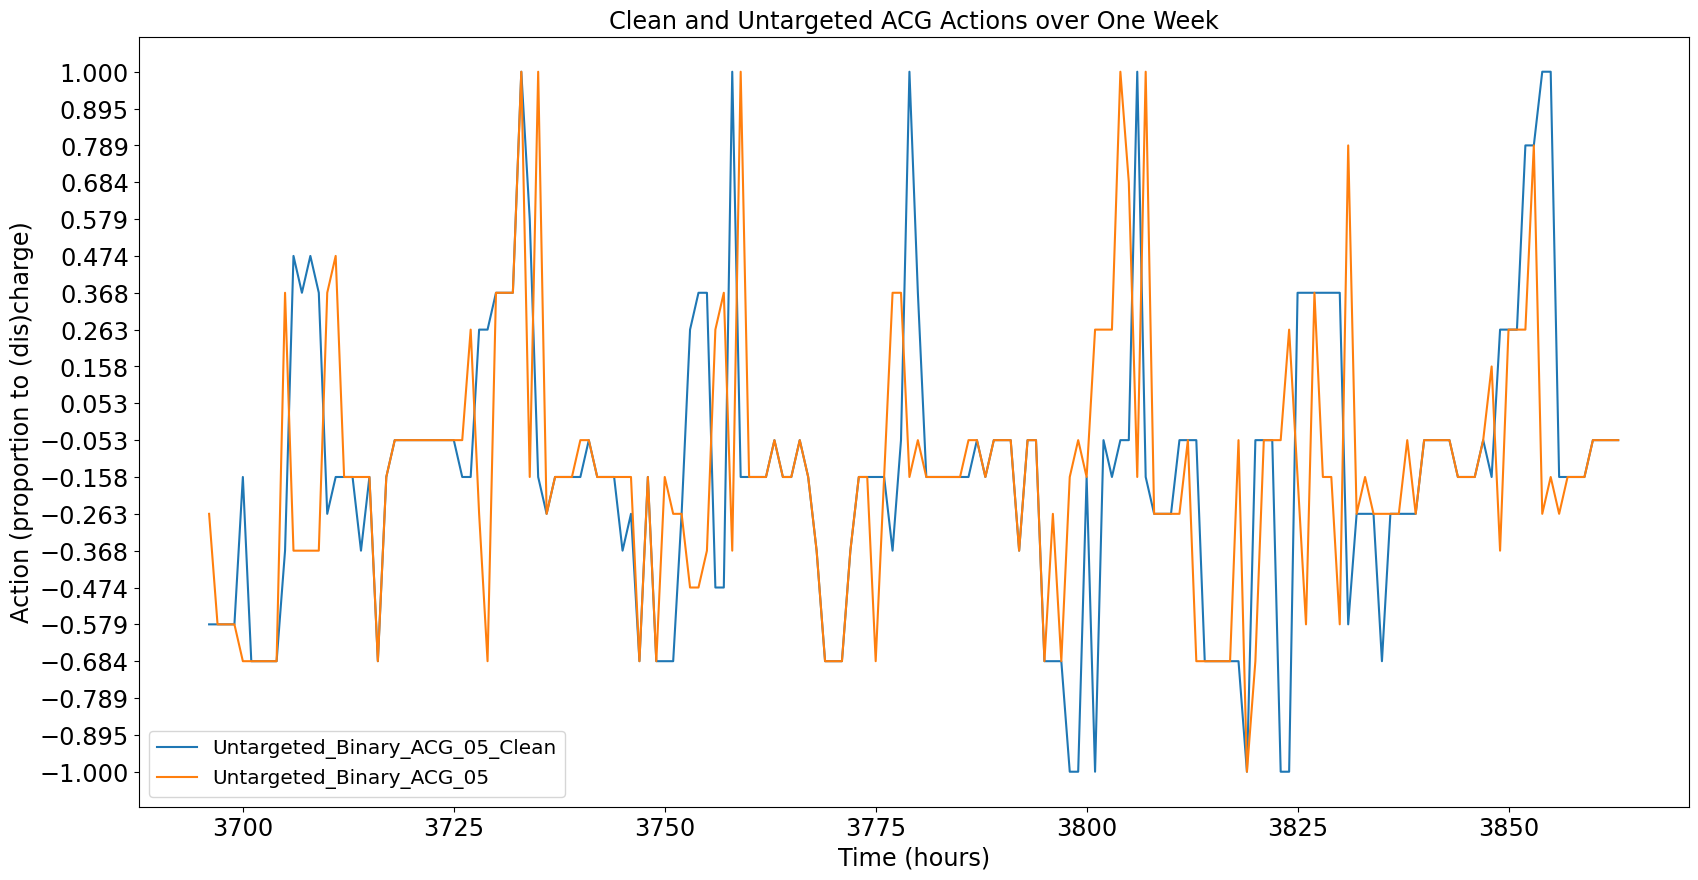

In [52]:
offest = 22*PERIOD
df_actions.iloc[START+offest:offest+START+PERIOD][['Untargeted_Binary_ACG_05_Clean','Untargeted_Binary_ACG_05']].plot.line(
    figsize=(20,10),
    ylabel='Action (proportion to (dis)charge)',
    yticks=actions_to_SoC,
    title='Clean and Untargeted ACG Actions over One Week',
    xlabel='Time (hours)'
)#.set_xticks(ticks=range(0,PERIOD,24),
#             labels=['Day ' + str(i+1) for i in range(DAYS)])

We see the the two plot line up more than above, reflecting the 36.6% ASR. Note that when the actions differ, often, so does their sign/(dis)charge. This significantly increases the power consumption